In [38]:
import pickle
fr=open("predict1122.txt","rb")
result=pickle.load(fr)
con_p=result[0][-30:]
act_p=result[1][-30:]

In [39]:
print(con_p,act_p)

[671.8, 635.4, 643.7, 637.9, 653.5, 654.4, 603.3, 601.4, 599.8, 627.0, 636.5, 692.2, 687.4, 690.9, 693.4, 676.7, 665.3, 677.6, 649.9, 676.0, 672.0, 655.7, 710.8, 655.4, 664.4, 696.6, 683.0, 702.3, 708.9, 709.8] [715.2, 688.7, 696.7, 726.0, 717.3, 709.7, 653.0, 660.6, 667.5, 685.2, 667.2, 718.1, 717.6, 747.7, 733.3, 750.5, 738.1, 728.6, 711.2, 724.9, 726.0, 726.2, 740.4, 726.7, 678.9, 737.6, 734.4, 737.4, 721.9, 741.7]


In [40]:
import pandas as pd

data=pd.read_csv(r"data.csv")
data=data.iloc[-30:,:]
con=data['con_settlement'].values.tolist()
con_closing=data['con_closing'].values.tolist()
act=data['act_settlement'].values.tolist()
act_closing=data['act_closing'].values.tolist()

In [41]:
print(con,act)

[706.9, 721.7, 688.4, 644.7, 650.7, 625.5, 612.9, 613.1, 627.2, 631.7, 698.9, 702.4, 688.5, 684.5, 687.6, 677.6, 678.5, 666.2, 664.5, 667.3, 671.7, 670.0, 670.6, 674.5, 683.6, 680.0, 684.7, 696.0, 696.5, 700.0] [649.4, 635.9, 642.6, 649.3, 655.8, 625.5, 612.9, 613.1, 627.2, 631.7, 698.9, 702.4, 688.5, 684.5, 687.6, 670.8, 671.9, 662.4, 667.2, 670.7, 670.0, 670.9, 673.0, 678.4, 688.2, 683.5, 684.7, 696.0, 696.5, 700.0]


In [42]:
count=0
count1=0
count2=0
for i in range(2,30):
    if (con_p[i]-con_p[i-1])*(con[i]-con[i-1])>0:
        count+=1
    if (con[i]-con[i-1])*(con[i-1]*con[i-2])>0:
        count1+=1
    if (con_p[i]-con_p[i-1])*(con[i-1]-con[i-2])>0:
        count2+=1
count/28,count1/28,count2/28

(0.6071428571428571, 0.6071428571428571, 0.6071428571428571)

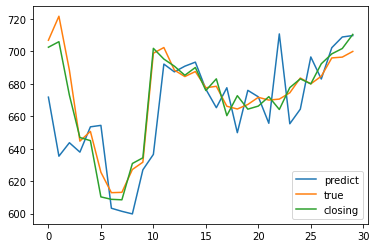

In [43]:
import matplotlib.pyplot as plt

plt.plot(con_p,label="predict")
plt.plot(con,label="true")
plt.plot(con_closing,label="closing")
plt.legend()
plt.show()

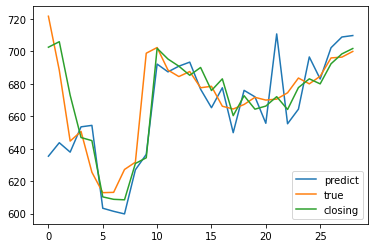

In [45]:
plt.plot(con_p[1:],label="predict")
plt.plot(con[1:],label="true")
plt.plot(con_closing[:-1],label="closing")
plt.legend()
plt.show()

0.6


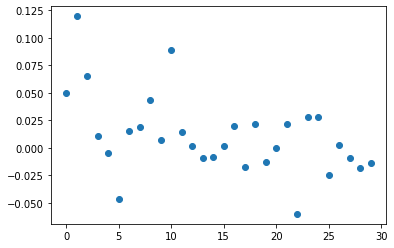

In [46]:
ratio=[]
count=0
for i in range(len(con)):
    ratio.append((con[i]-con_p[i])/con[i])
    if abs((con[i]-con_p[i])/con[i])<0.02:
        count+=1
print(count/30)
plt.scatter(range(30),ratio)
plt.show()

In [47]:
count=0
count1=0
count2=0
for i in range(2,30):
    if (act_p[i]-act_p[i-1])*(act[i]-act[i-1])>0:
        count+=1
    if (act[i]-act[i-1])*(act[i-1]*act[i-2])>0:
        count1+=1
    if (act_p[i]-act_p[i-1])*(act[i-1]-act[i-2])>0:
        count2+=1
count/28,count1/28,count2/28

(0.5357142857142857, 0.7142857142857143, 0.5714285714285714)

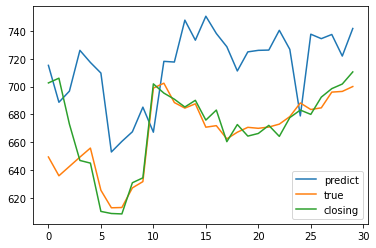

In [48]:
plt.plot(act_p,label="predict")
plt.plot(act,label="true")
plt.plot(con_closing,label="closing")
plt.legend()
plt.show()

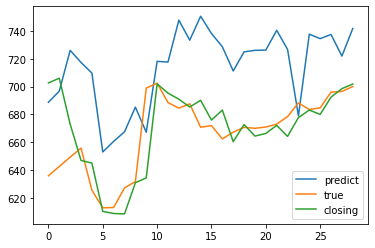

In [49]:
plt.plot(act_p[1:],label="predict")
plt.plot(act[1:],label="true")
plt.plot(con_closing[:-1],label="closing")
plt.legend()
plt.show()

In [6]:
count=0
for i in range(30):
    if abs((con[i]-con_p[i])/con[i])<0.02:
        count+=1
    else:
        print(i)
count/30

1
2
3
5
8
10
14
16
18
19
20
22


0.6

In [7]:
count=0
for i in range(30):
    if abs((act[i]-act_p[i])/act[i])<0.02:
        count+=1
    else:
        print(i)
count/30

0
4
5
6
7
10
12
13
14
15
16
17
19


0.5666666666666667

In [15]:
diff=0
for i in range(30):
    diff+=(con[i]-con_p[i])**2/con[i]
(diff/30)**0.5

0.9696932468536043

In [16]:
diff=0
for i in range(30):
    diff+=(act[i]-act_p[i])**2/act[i]
(diff/30)**0.5

2.1318137014614904